# GPT-2

In [ ]:
%tensorflow_version 1.x
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files

TensorFlow 1.x selected.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
import gpt_2_simple as gpt2

In [ ]:
!nvidia-smi

Tue Apr 27 16:04:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
gpt2.download_gpt2(model_name="124M")

NameError: ignored

In [ ]:
gpt2.mount_gdrive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_name = "/content/drive/MyDrive/dwightTotal.txt"

In [ ]:
gpt2.copy_file_from_gdrive('dwightTotal.txt')

In [ ]:
sess = gpt2.start_tf_sess()

gpt2.finetune(sess,
              dataset=file_name,
              model_name='124M',
              steps=1000,
              restore_from='fresh',
              run_name='run1',
              print_every=10,
              sample_every=200,
              save_every=500
              )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Loading checkpoint models/124M/model.ckpt
INFO:tensorflow:Restoring parameters from models/124M/model.ckpt


  0%|          | 0/1 [00:00<?, ?it/s]

Loading dataset...


100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


dataset has 117347 tokens
Training...
[10 | 51.13] loss=3.31 avg=3.31
[20 | 94.32] loss=3.21 avg=3.26
[30 | 137.61] loss=3.09 avg=3.20
[40 | 180.89] loss=3.12 avg=3.18
[50 | 224.09] loss=2.66 avg=3.07
[60 | 267.35] loss=2.70 avg=3.01
[70 | 310.55] loss=2.77 avg=2.97
[80 | 353.75] loss=2.73 avg=2.94
[90 | 396.99] loss=2.26 avg=2.86
[100 | 440.17] loss=2.51 avg=2.83
[110 | 483.34] loss=2.43 avg=2.79
[120 | 526.50] loss=2.44 avg=2.76
[130 | 569.63] loss=2.07 avg=2.70
[140 | 612.84] loss=1.67 avg=2.62
[150 | 656.06] loss=1.70 avg=2.56
[160 | 699.22] loss=1.47 avg=2.48
[170 | 742.39] loss=1.60 avg=2.43
[180 | 785.57] loss=1.90 avg=2.40
interrupted
Saving checkpoint/run1/model-184


KeyboardInterrupt: ignored

In [ ]:
gpt2.copy_checkpoint_to_gdrive(run_name='run1')

KeyboardInterrupt: ignored

Load a Trained Model Checkpoint


In [ ]:
print(gpt2.copy_checkpoint_from_gdrive(run_name='run1'))

None


In [ ]:
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, run_name='run1')

Loading checkpoint checkpoint/run1/model-1000
INFO:tensorflow:Restoring parameters from checkpoint/run1/model-1000


In [ ]:
!pip install bertviz
!pip install transformers

In [ ]:
gpt2.generate(sess, run_name='run1',nsamples=1)

You are out of luck.  Don't you worry, she'll be fine.  Her appendix-
What?
She said she had a diseased gallbladder. 
That's debatable. 
Well, the new IT guy, you know going.
He's like the guy from Battlestar Galactica.  He's like Trek's Trek, you know.
I don't think so.
Yeah, is there a book that shows how badass she is?
Yeah, that's a terrible idea.
What is that?
You know that's a reference to Roman numerals, right?
That's not true.
Yeah, read on: a) Rome was a democratic state, and b] the Spartans were a fascist dictatorship.
How do we best alliance? We gotta get along!
Yo, Daryl. Hello Daryl. 
Hey, it's Dwight from the vestibule. Listen, uh, I just wanted to say that we both have been together a long time and we had a good time, and b] Hades is overstretching. 
Hey, why don't you come in? You and your tie are perfect.
Okay, come on, it's a party. It's not a gun. Come in.
Okay, why are you dressed like a vampire?
Hey, you know what? I could've seduced you already. Just have a seat. 

In [ ]:
import pandas as pd
result_df = pd.DataFrame()
df = pd.read_csv('dwt.txt',names=['quotes'])
df = df.dropna()
seed = []
continution = []
for i in range(700,800):
  print(i) 
  try:
    a=gpt2.generate(sess, prefix=df.quotes.values[i].split()[0],run_name='run1',nsamples=1,include_prefix=False,batch_size=1,length=20,temperature=0.3,return_as_list=True)
    result_df=result_df.append({'seed':df.quotes.values[i].split()[0],'cont':a[0].split('\n')[1]}, ignore_index=True)
  except IndexError:
    pass   
result_df


700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799


,cont,seed
0,"I'm sorry, it's on the list, Michael.",salesman
1,I have a girlfriend...,laugh
2,"Yes, temp.",revolut
3,"Pam, I'm gonna miss you.",peopl
4,"Oh, no, no. No. No. No. No.",ok
...,...,...
93,Michael? [to Michael] Hey!,michael
94,I'm just gonna warn you...,think
95,"I have a friend, the Scranton Zoning Board, wh...",monkey
96,[to Pam] How's that sound?,want


In [ ]:
result_df.to_csv('iter7.csv')
!cp iter7.csv "drive/My Drive/"

'understand'

In [ ]:
print(pd.DataFrame.from_dict(res),orient='index',columns=['seed','value'])

ValueError: ignored

In [ ]:
a=gpt2.generate(sess, prefix="Hey Michel",run_name='run1',nsamples=1,include_prefix=False,batch_size=1,length=20,temperature=0.3,return_as_list=True)
print(a[0].split('\n')[1])

[whispering] You're gonna blow it. 


In [ ]:
gpt2.generate_to_file(sess, prefix="Hey Michel",run_name='run1',nsamples=5,include_prefix=False,batch_size=1,length=20,temperature=0.3)

In [ ]:
a=gpt2.generate(sess, prefix="Hey Michel",run_name='run1',nsamples=1,include_prefix=False,batch_size=1,length=20,temperature=0.3,return_as_list=True)
print(a)

['Hey Michel!\n[to Michael] You should be dead.\nYou should be dead.\nThen you']


In [ ]:
gpt2.generate(sess,
              length=100,
              temperature=0.7,
              prefix='<|startoftext|>',
              truncate='<|endoftext|>',
              include_prefix=False,
              nsamples=20,
              batch_size=20,
              run_name='run1'
              )

In [ ]:
from gpt_2_simple.src import model, sample, encoder, memory_saving_gradients
from gpt_2_simple.src import model, sample, encoder, memory_saving_gradients
import os
import json
import tensorflow as tf
import numpy as np

def get_perplexity(sess,
               run_name='run1',
               checkpoint_dir='checkpoint',
               model_name='124M',
               model_dir='models',
               prefix="<|endoftext|>",
               continuation="Hello"):
    
    """
    Returns perplexity score for given continuation of a given prefix.
    
    Examples:
    perplexity(sess, model_name="124M", prefix="Hello, my name is", continuation=" James Smith, I am an engineer")  # returns 17.3124
    perplexity(sess, model_name="124M", prefix="Hello, my name is", continuation=" very else whatever general cat meow.")  # returns 5197.99
    """

    batch_size=1

    if model_name:
        checkpoint_path = os.path.join(model_dir, model_name)
    else:
        checkpoint_path = os.path.join(checkpoint_dir, run_name)

    enc = encoder.get_encoder('/content/checkpoint/run1')

    context_tokens = enc.encode(prefix)

    context_size = len(context_tokens)
    continuation_tokens = enc.encode(continuation)

    full_sentence = prefix+continuation

    logits = get_logits(sess, run_name, checkpoint_dir, model_name, model_dir, full_sentence, all=True)

    logits = logits[context_size-1:-1, :]  # only continuation logits
    logitmeans = np.mean(logits, axis=1)
    logits = logits - logitmeans[:, None]
    explogits = np.exp(logits)
    probabs = explogits / np.sum(explogits,axis=1)[:, None]
    try:
      probab_scores = np.nan_to_num([probabs[i, index] for i, index in enumerate(continuation_tokens)])
      perplexity = 2 ** (-np.mean(np.log2(probab_scores)))
    except IndexError:
      perplexity = float("NaN")
    return perplexity

def get_logits(sess,
             run_name='run1',
             checkpoint_dir='checkpoint',
             model_name=None,
             model_dir='models',
             prefix="<|endoftext|>",
             all=False):

    batch_size=1

    if model_name:
        checkpoint_path = os.path.join(model_dir, model_name)
    else:
        checkpoint_path = os.path.join(checkpoint_dir, run_name)

    enc = encoder.get_encoder('/content/checkpoint/run1')
    hparams = model.default_hparams()
    with open(os.path.join('/content/checkpoint/run1', 'hparams.json')) as f:
        hparams.override_from_dict(json.load(f))

    if prefix:
        context = tf.compat.v1.placeholder(tf.int32, [batch_size, None])
        context_tokens = enc.encode(prefix)

    def step(hparams, tokens, past=None):
        lm_output = model.model(hparams=hparams, X=tokens,
                                past=past, reuse=tf.compat.v1.AUTO_REUSE)

        logits = lm_output['logits'][:, :, :hparams.n_vocab]
        presents = lm_output['present']
        presents.set_shape(model.past_shape(
            hparams=hparams, batch_size=batch_size))
        return {
            'logits': logits,
            'presents': presents,
        }

    output = step(hparams, context)

    out = sess.run(output, feed_dict={
                    context: batch_size * [context_tokens]
                })

    if all:
        return out['logits'][0, :, :]  # all logits starting from the second token, n logits for n tokens
    return out['logits'][0, -1, :]  # logits for next token

In [ ]:
import pandas as pd
nan_value = float("NaN")
df = pd.read_csv('iter1.csv')
df.replace("", nan_value, inplace=True)

df.dropna(subset = ["cont"], inplace=True)
print(df.describe())
df.to_csv('save.csv')
!cp save.csv "drive/My Drive/"

                           cont seed
count                       664  664
unique                      434  313
top     I have a girlfriend...    oh
freq                         67   29


In [ ]:
p_scores = []
p_df = pd.DataFrame()
for i in range(600,664):
  print(i)
  p_df = p_df.append({'pscore':get_perplexity(sess, model_name="124M", prefix=df.seed.values[i], continuation=df.cont.values[i])},ignore_index=True)

600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663


In [ ]:
p_df

,pscore
0,3.339725
1,5.371413
2,16.314155
3,29.737958
4,12.275595
...,...
59,30.534489
60,21.000838
61,4.450444
62,13.074043


In [ ]:
p_df.to_csv('p4.csv')
!cp p4.csv "drive/My Drive/"

In [ ]:

get_perplexity(sess, model_name="124M", prefix="Hello, my name is", continuation=" James Smith, I am an engineer")

2038.6611628581697

# LSTM

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [ ]:
import re
filename = "/content/drive/MyDrive/dwightTotal.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
raw_text=raw_text.replace('\n','')


no_emotions=re.sub("[\(\[].*?[\)\]]", "", raw_text)
dd=no_emotions.split(' ')
for j,i in enumerate(dd):
    if "\'" in i:
        dd[j]=i.replace("\'",'')
raw_text = ' '.join(dd)
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))





In [ ]:
n_chars = len(raw_text)
n_vocab = len(chars)
print( "Total Characters: ", n_chars)
print( "Total Vocab: ", n_vocab)

In [ ]:
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print( "Total Patterns: ", n_patterns)

In [ ]:
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
model.fit(X, y, epochs=40, batch_size=128)



In [ ]:
model

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))


In [ ]:
import sys
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(1000):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print ("\nDone.")

Flaw with the above is because of repetition. https://stackoverflow.com/questions/47125723/keras-lstm-for-text-generation-keeps-repeating-a-line-or-a-sequence

# **LSTM 2**

In [ ]:
import pandas as pd
quotes_csv = pd.read_csv(file_name, delimiter = '\t', header=None, error_bad_lines=False)
quotes_csv = quotes_csv.rename(columns={0: 'quote', 1:'quote_author', 2:'associative_tags'})
quotes_csv['quote_length'] = quotes_csv.quote.map(lambda x: len(x))

In [ ]:
cleaned_quotes = []
quotes = list(quotes_csv.quote + '\n')

removed_char = ['#', '$', '%', '(', ')', '=', ';', ':', '*', '+', '£', '—', '’']
cleaned_quotes = []
sentences = []
next_chars = []
len(quotes)

6402

In [ ]:
quotes[:10]

['[singing] Shall I play for you? Pa rum pump um pum [Imitates heavy drumming] I have no gifts for you. Pa rum pump um pum [Imitates heavy drumming]\n',
 'Whassup!\n',
 'Whassup.\n',
 'What?\n',
 "Just clearing my desk. I can't concentrate.\n",
 "It's overlapping. It's all spilling over the edge. One word, two syllables. Demarcation.\n",
 "You can't do that.\n",
 'Safety violation. I could fall and pierce an organ.\n',
 'Downsizing?\n',
 'Downsizing? I have no problem with that. I have been recommending downsizing since I first got here. I even brought it up in my interview. I say, bring it on.\n']

In [ ]:
import re
for i,quote in enumerate(quotes):
    for s_char in removed_char:
        quote = quote.replace(s_char, ' ') #To removed unnessacry charcs
        pattern = re.compile(r'\s{2,}') #Removing whitespaces and storing cleaned quotes
        quote = re.sub(pattern, ' ', quote)
 
        cleaned_quotes.append(quote)
    if i%200==0:
      print(i)
    text = ' '.join(cleaned_quotes)
    chars = sorted(list(set(text)))

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400


In [ ]:
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
import numpy as np
maximum_quote_length = 15
step = 6

for quote in cleaned_quotes:
    for i in range(0, len(quote) - maximum_quote_length, step):
        sentences.append(quote[i: i + maximum_quote_length])
        next_chars.append(quote[i + maximum_quote_length])
    sentences.append(quote[-maximum_quote_length:])
    next_chars.append(quote[-1])
print('nb sequences:', len(sentences))

print('Vectorization Process...')

x = np.zeros((len(sentences), maximum_quote_length, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

nb sequences: 826718
Vectorization Process...


In [ ]:
import nltk
nltk.download('punkt')
 
from nltk import word_tokenize
 
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.models import model_from_json
from keras.layers import Input, Activation, Dense, Dropout
from keras.layers import LSTM, Bidirectional
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("/content/drive/MyDrive/model_history_log.csv", append=True)
print('Build model...')

def perplexity(y_true, y_pred):
    print(y_true,'------------', y_pred)
    cross_entropy = K.categorical_crossentropy(y_true, y_pred)
    perplexity = K.pow(2.0, cross_entropy)
    return perplexity
input_sequences = Input((maximum_quote_length, len(chars)) , name="input_sequences")
lstm = Bidirectional(LSTM(256, return_sequences= True, input_shape=(maximum_quote_length, len(chars))), name = 'bidirectional')(input_sequences)
lstm = Dropout(0.1, name = 'dropout_bidirectional_lstm')(lstm)
lstm = LSTM(64, input_shape=(maximum_quote_length, len(chars)), name = 'lstm')(lstm)
lstm = Dropout(0.1,  name = 'drop_out_lstm')(lstm)

dense = Dense(15 * len(chars), name = 'first_dense')(lstm)
dense = Dropout(0.1,  name = 'drop_out_first_dense')(dense)
dense = Dense(5 * len(chars), name = 'second_dense')(dense)
dense = Dropout(0.1,  name = 'drop_out_second_dense')(dense)
dense = Dense(len(chars), name = 'last_dense')(dense)

next_char = Activation('softmax', name = 'activation')(dense)

model2 = Model([input_sequences], next_char)
model2.load_weights('/content/drive/MyDrive/lstm_weights_perp.hdf5') #Load weights here
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=[perplexity])
model_checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/lstm_weights_perp.hdf5',
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)
model2.summary()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Build model...
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_sequences (InputLayer) [(None, 15, 90)]          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 512)           710656    
_________________________________________________________________
dropout_bidirectional_lstm ( (None, 15, 512)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                147712    
_________________________________________________________________
drop_out_lstm (Dropout)      (None, 64)                0         
_________________________________________________________________
first_dense (Dense)          (None, 1350)              87750     

In [ ]:
model2.fit([x], y,
         batch_size=2048,
          epochs= 200, callbacks=[model_checkpoint_callback,csv_logger],
         )
two_first_words = [bigram for bigram in [' '.join(word_tokenize(quote)[:2]) for quote in quotes] if
                   len(bigram) <= maximum_quote_length]

Epoch 1/200
Tensor("Cast_1:0", shape=(None, 90), dtype=float32) ------------ Tensor("model_5/activation/Softmax:0", shape=(None, 90), dtype=float32)
Tensor("Cast_1:0", shape=(None, 90), dtype=float32) ------------ Tensor("model_5/activation/Softmax:0", shape=(None, 90), dtype=float32)
404/404 [==============================] - 36s 81ms/step - loss: 0.0105 - perplexity: 23.6503
Epoch 2/200
404/404 [==============================] - 31s 76ms/step - loss: 0.0102 - perplexity: 54.6903
Epoch 3/200
404/404 [==============================] - 31s 77ms/step - loss: 0.0102 - perplexity: 1.7975
Epoch 4/200
404/404 [==============================] - 31s 78ms/step - loss: 0.0101 - perplexity: 47.4743
Epoch 5/200
404/404 [==============================] - 31s 77ms/step - loss: 0.0097 - perplexity: 79.1090
Epoch 6/200
404/404 [==============================] - 31s 77ms/step - loss: 0.0103 - perplexity: 13541.1714
Epoch 7/200
404/404 [==============================] - 31s 77ms/step - loss: 0.0111 - pe

KeyboardInterrupt: ignored

In [ ]:
def sample(preds, temperature=0.8):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

import numpy as np
maximum_quote_length = 15
def generate_OG_quote(sentence=None, diversity=0.9):
    if not sentence: 
        random_index = np.random.randint(0, len(two_first_words))
        sentence = two_first_words[random_index]

    if len(sentence) > maximum_quote_length:
        sentence = sentence[-maximum_quote_length:]
    elif len(sentence) < maximum_quote_length:
        sentence = ' ' * (maximum_quote_length - len(sentence)) + sentence
    
    generated = ''
    generated += sentence
    # sys.stdout.write(generated)
    next_char = 'Empty'
    total_word = 0

    max_word = 150
    
    while ((next_char not in ['\n','.']) & (total_word <= 100)):

        x_pred = np.zeros((1, maximum_quote_length, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.

        preds = model2.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = indices_char[next_index]

        if next_char == ' ':
            total_word += 1
        generated += next_char
        sentence = sentence[1:] + next_char

        # sys.stdout.write(next_char)
        # sys.stdout.flush()
    print(generated)

generate_OG_quote("Hello")

NameError: ignored

In [ ]:
import keras.backend as K
lstm = model2.layers[2]

# Get output from intermediate layer to visualize activations
attn_func = K.function(inputs = [model2.get_input_at(0), K.learning_phase()],
           outputs = [lstm.output]
          )

In [ ]:
def cstr(s, color='black'):
	if s == ' ':
		return "<text style=color:#000;padding-left:10px;background-color:{}> </text>".format(color, s)
	else:
		return "<text style=color:#000;background-color:{}>{} </text>".format(color, s)
	
# print html
def print_color(t):
	display(html_print(''.join([cstr(ti, color=ci) for ti,ci in t])))

# get appropriate color for value
def get_clr(value):
	colors = ['#85c2e1', '#89c4e2', '#95cae5', '#99cce6', '#a1d0e8'
		'#b2d9ec', '#baddee', '#c2e1f0', '#eff7fb', '#f9e8e8',
		'#f9e8e8', '#f9d4d4', '#f9bdbd', '#f8a8a8', '#f68f8f',
		'#f47676', '#f45f5f', '#f34343', '#f33b3b', '#f42e2e']
	value = int((value * 100) / 5)
	return colors[value]

# sigmoid function
def sigmoid(x):
	z = 1/(1 + np.exp(-x)) 
	return z

In [ ]:
def visualize(output_values, result_list, cell_no):
	print("\nCell Number:", cell_no, "\n")
	text_colours = []
	for i in range(len(output_values)):
		text = (result_list[i], get_clr(output_values[i][cell_no]))
		text_colours.append(text)
	print_color(text_colours)

In [ ]:
def get_predictions(data):
	start = np.random.randint(0, len(data)-1)
	pattern = data[start]
	result_list, output_values = [], []
	print("Seed:")
	print("\"" + ''.join([int_to_char[value] for value in pattern]) + "\"")
	print("\nGenerated:")

	for i in range(1000):
		# Reshaping input array for predicting next character
		x = np.reshape(pattern, (1, len(pattern), 1))
		x = x / float(n_vocab)

		# Prediction
		prediction = model2.predict(x, verbose=0)

		# LSTM Activations
		output = attn_func([x])[0][0]
		output = sigmoid(output)
		output_values.append(output)

		# Predicted Character
		index = np.argmax(prediction)
		result = int_to_char[index]

		# Preparing input for next character
		seq_in = [int_to_char[value] for value in pattern]
		pattern.append(index)
		pattern = pattern[1:len(pattern)]

		# Saving generated characters
		result_list.append(result)
	return output_values, result_list


In [ ]:
output_values, result_list = get_predictions("1")

for cell_no in [189, 435, 463]:
	visualize(output_values, result_list, cell_no)

TypeError: ignored

NameError: ignored

# Markov Chain

# Preprocessing text data

In [ ]:
cleaned_quotes_1 = list(set(cleaned_quotes))

In [ ]:
raw_text= ' '.join(cleaned_quotes_1)

raw_text=raw_text.replace('\n','')


no_emotions=re.sub("[\(\[].*?[\)\]]", "", raw_text)
dd=no_emotions.split(' ')
for j,i in enumerate(dd):
    if "\'" in i:
        dd[j]=i.replace("\'",'')
raw_text = ' '.join(dd)
raw_text
punctuation_pad = '!?.,:-;'
punctuation_remove = '"()_\n'

content_preprocess = re.sub(r'(\S)(\n)(\S)', r'\1 \2 \3', raw_text)
content_preprocess = content_preprocess.translate(str.maketrans('', '', punctuation_remove))
content_preprocess = content_preprocess.translate(str.maketrans({key: ' {0} '.format(key) for key in punctuation_pad}))
content_preprocess = re.sub(' +', ' ', content_preprocess)
content = content_preprocess.strip()



# Constructing ngrams and tokens

In [ ]:
n=1 #No of ngrams
tokens =  content.split(' ')
dis_tokens = list(set(tokens))
dis_tokens.append('!Dummy!')
sequences = [tokens[i:] for i in range(n)]
ngrams = [' '.join(ngram) for ngram in list(zip(*sequences))]
ngrams_dist = list(set(ngrams))
value2ind = {value: ind for ind, value in enumerate(dis_tokens)}
ind2value = dict(enumerate(dis_tokens))
tokens_ind = [value2ind[token] if token in value2ind.keys() else  value2ind['!Dummy!'] for token in tokens]
ngram2ind={value: ind for ind, value in enumerate(ngrams_dist)}
ind2ngram = dict(enumerate(ngrams_dist))

import scipy.sparse
from sklearn.preprocessing import normalize
row_ind, col_ind, values = [], [], []

for i in range(len(tokens[:-n])):
    ngram = ' '.join(tokens[i:i + n])
    ngram_ind = ngram2ind[ngram]
    next_word_ind = value2ind[tokens[i + n]]

    row_ind.extend([ngram_ind])
    col_ind.extend([next_word_ind])
    values.extend([1])

transition_matrix_prob = scipy.sparse.coo_matrix((values, (row_ind, col_ind)), shape=(len(ngram2ind), len(value2ind)))
transition_matrix_prob=normalize(transition_matrix_prob, norm='l1', axis=1)

import numpy
all_sens = []
for i in range(1000):
  word_len=4
  test=str(numpy.random.choice(ngrams))
  sequence = test.split(' ')
  for i in range(word_len):
      prefix_ind = ngram2ind[test]
      weights = transition_matrix_prob[prefix_ind].toarray()[0]
      token_ind = numpy.random.choice(range(len(weights)), p=weights)
      next_word = ind2value[token_ind]
      sequence.append(next_word)
      prefix = ' '.join(sequence[-n:])
  all_sens.append(' '.join(sequence))
# print('SEED: ',test)
# print('sss',sequence)
# print(' '.join(sequence))

# Building probability matrix for word sequences

In [ ]:
import scipy.sparse
from sklearn.preprocessing import normalize
row_ind, col_ind, values = [], [], []

for i in range(len(tokens[:-n])):
    ngram = ' '.join(tokens[i:i + n])
    ngram_ind = ngram2ind[ngram]
    next_word_ind = value2ind[tokens[i + n]]

    row_ind.extend([ngram_ind])
    col_ind.extend([next_word_ind])
    values.extend([1])

transition_matrix_prob = scipy.sparse.coo_matrix((values, (row_ind, col_ind)), shape=(len(ngram2ind), len(value2ind)))
transition_matrix_prob=normalize(transition_matrix_prob, norm='l1', axis=1)

<69604x8905 sparse matrix of type '<class 'numpy.float64'>'
	with 82733 stored elements in Compressed Sparse Row format>

# Generating text given seed

In [ ]:
import numpy
all_sens = []
for i in range(100):
  word_len=5
  test=str(numpy.random.choice(ngrams))
  sequence = test.split(' ')
  for i in range(word_len):
      prefix_ind = ngram2ind[test]
      weights = transition_matrix_prob[prefix_ind].toarray()[0]
      token_ind = numpy.random.choice(range(len(weights)), p=weights)
      next_word = ind2value[token_ind]
      sequence.append(next_word)
      prefix = ' '.join(sequence[-n:])
  all_sens.append(' '.join(sequence))
# print('SEED: ',test)
# print('sss',sequence)
# print(' '.join(sequence))

**SEED:  to sell**
to sell more more more paper .

# Evaluation

In [ ]:
import keras.backend as K
import math
def perplexity(y_true, y_pred, mask=None):
    if mask is not None:
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        mask = K.permute_dimensions(K.reshape(mask, y_true.shape[:-1]), (0, 1, 'x'))
        truth_mask = K.flatten(y_true*mask).nonzero()[0]  ### How do you do this on tensorflow?
        predictions = K.gather(y_pred.flatten(), truth_mask)
        return K.pow(2, K.mean(-K.log(predictions)))
    else:
        return K.pow(2, K.mean(-K.log(y_pred)))

perplexity(0.0132,0.0132)
# def perplexity_raw(y_true, y_pred):
    
#     cross_entropy = K.cast(K.equal(K.max(y_true, axis=-1),
#                           K.cast(K.argmax(y_pred, axis=-1), K.floatx())),
#                   K.floatx())
#     perplexity = K.exp(cross_entropy)
#     return perplexity

# def perplexity(y_true, y_pred):
   
#     cross_entropy = K.sparse_categorical_crossentropy(y_true, y_pred)
#     perplexity = K.exp(cross_entropy)
#     return perplexity

# def ppl_e(y_true, y_pred):
#     return K.exp(K.mean(K.categorical_crossentropy(y_true, y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=20.077927>

In [ ]:
ppl_e([1,0],[1,0])

NameError: ignored

In [ ]:
!pip install "nltk==3.4.5"

     |████████████████████████████████| 1.5MB 8.5MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp37-none-any.whl size=1449904 sha256=d28ecc8e0dd631ca0cc4868f1f9ae2b8fd572738777bb63a828c824f4d9a8c87
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import nltk
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE


In [ ]:
train_sentences=cleaned_quotes_1
len(list(set(train_sentences)))
tokenized_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sent))) 
                for sent in train_sentences]

In [ ]:

nltk.download('punkt')
tokenized_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sent))) for sent in train_sentences]
train_data = [nltk.trigrams(t,  pad_right=True, pad_left=True, left_pad_symbol="<s>", right_pad_symbol="</s>") for t in tokenized_text]
words = [word for sent in tokenized_text for word in sent]
words.extend(["<s>", "</s>"])
padded_vocab = Vocabulary(words)
model = MLE(n)
model.fit(train_data, padded_vocab)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokenized_text[0]
train_dataa = tokenized_text[:5000]
test_dataa = tokenized_text[5001:]


['that', 'is', 'my', 'idea', '.']

In [ ]:
# n = 2
train_data, padded_vocab = padded_everygram_pipeline(n, tokenized_text)
model = MLE(n)
model.fit(train_data, padded_vocab)

In [ ]:
test_sentences = all_sens
tokenized_text = [list(map(str.lower, nltk.tokenize.word_tokenize(sent))) 
                for sent in train_sentences]
# test_data = [nltk.trigrams(t,  pad_right=True, pad_left=True, left_pad_symbol="<s>", right_pad_symbol="</s>") for t in tokenized_text]
test_data, _ = padded_everygram_pipeline(n, tokenized_text)


In [ ]:
test_data, _ = padded_everygram_pipeline(n, tokenized_test)
test_data
for i, test in enumerate(test_data):
  print("PP({0}):{1}".format(test_sentences[i], model.perplexity(test)))
  

PP(I am . not 99% cool praying wiser a faster better no):inf
PP(! BAT ! ! ! ! ! ! ! ! ! !):inf
PP(it . Thats Pam Good Who Stop And No Youre Im We):inf
PP(Whatever . Hey Hey Watch Im Im Watch Im Watch Watch Hey):inf
PP(. Im just sorry suspicious gonna gonna relaxing gonna guessing on gonna):inf
PP(to sit here here next next here here on here here on):inf
PP(sex with a Nellie a Nellie . Nellie . Nellie . a):inf
PP(smart and capable capable capable capable capable capable capable capable capable capable):inf
PP(. Agreed . ? . ? ? ? . . ? .):inf
PP(things . Im What I I Im Are Very Pasteurized Are So):inf
PP(, but theyre , Im to that I its theyre they he):inf
PP(opening another mans mans mans mans mans mans mans mans mans mans):inf
PP(was a test bunch bit laxative woman gift successful keeper bit respected):inf
PP(keys away from from from from from from from from from from):inf
PP(like what I I I I I I I I I I):inf
PP(? Dwights question question question question question question question 

In [ ]:
train_dataa = tokenized_text[:5000]
test_dataa = tokenized_text[5001:]


In [ ]:
#For Gpt-2
final_df = pd.read_csv('save.csv')
del final_df['Unnamed: 0']
final_df.drop_duplicates(subset ="seed",keep = False, inplace = True)
perp_dict = {}
for i in range(len(final_df)):
  perp_dict[i] = {'text':final_df['cont'].values[i],'perplexity':final_df['pscores'].values[i]}

In [ ]:
perp_dict

{0: {'perplexity': 27.20149488, 'text': 'I have a girlfriend... '},
 1: {'perplexity': 3.801016802,
  'text': "I'm just gonna warn you... and I say this to all my clients... you might"},
 2: {'perplexity': 30.3452937, 'text': "I'm just gonna warn you..."},
 3: {'perplexity': 23.79980559, 'text': 'I have a girlfriend... '},
 4: {'perplexity': 1085.5219650000001, 'text': 'Yeah.'},
 5: {'perplexity': 6.901190259,
  'text': "I'm sorry, it's on the list, Michael."},
 6: {'perplexity': 10.58104139,
  'text': "You're right. It's a regular ol' fashioned bear hug. "},
 7: {'perplexity': 28.94501915, 'text': 'I have a girlfriend... '},
 8: {'perplexity': 23.38701055, 'text': "I'm sorry it makes me nervous."},
 9: {'perplexity': 8.333935125,
  'text': '[on the phone] Excellent, good, good.'},
 10: {'perplexity': 10.66362379, 'text': "I'm gonna need a needle in my leg."},
 11: {'perplexity': 26.82102864, 'text': '[to Pam] Hey, who made this? '},
 12: {'perplexity': 36.77581735, 'text': "No, I'm go

In [ ]:
perp_dict = {}
test_data, _ = padded_everygram_pipeline(n, tokenized_test)
for i, test in enumerate(test_data):
  perp_dict[i] = {'text':test_sentences[i], 'perplexity':model.perplexity(test)}

In [ ]:
perp_dict

{0: {'perplexity': 1599.3855736680086, 'text': 'was a about being brought'},
 1: {'perplexity': 102.35682765317524, 'text': '. Remember . This Mm'},
 2: {'perplexity': inf, 'text': 'a lack gun family little'},
 3: {'perplexity': inf, 'text': 'read the this me the'},
 4: {'perplexity': inf, 'text': 'Take that a a those'},
 5: {'perplexity': 487.5817093632053, 'text': 'in heaven an , place'},
 6: {'perplexity': 271.4976825396176, 'text': 'dont understand you know look'},
 7: {'perplexity': 10594.732103549153, 'text': 'Dwight . Schrute . .'},
 8: {'perplexity': 42.93402837428828, 'text': 'everyone clumped who , doesnt'},
 9: {'perplexity': inf, 'text': 'Thats a not exactly how'},
 10: {'perplexity': inf, 'text': '. Do All Its .'},
 11: {'perplexity': 68225.1092068877, 'text': 'email me gets me ,'},
 12: {'perplexity': 7696.867938255022, 'text': 'chain of of , of'},
 13: {'perplexity': 654.6972243844019, 'text': 'a normal paper seven row'},
 14: {'perplexity': 48.800541712223485, 'text': '

In [ ]:
vals = []
for i in perp_dict:
  if perp_dict[i]['perplexity'] >10000.0:
    vals.append(10000.0)
  else:
    vals.append(perp_dict[i]['perplexity'])
    
  

In [ ]:
#For GPT2
vals = []
for i in perp_dict:
  if perp_dict[i]['perplexity'] >10000.0:
    vals.append(10000.0)
  else:
    vals.append(perp_dict[i]['perplexity'])

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, '')

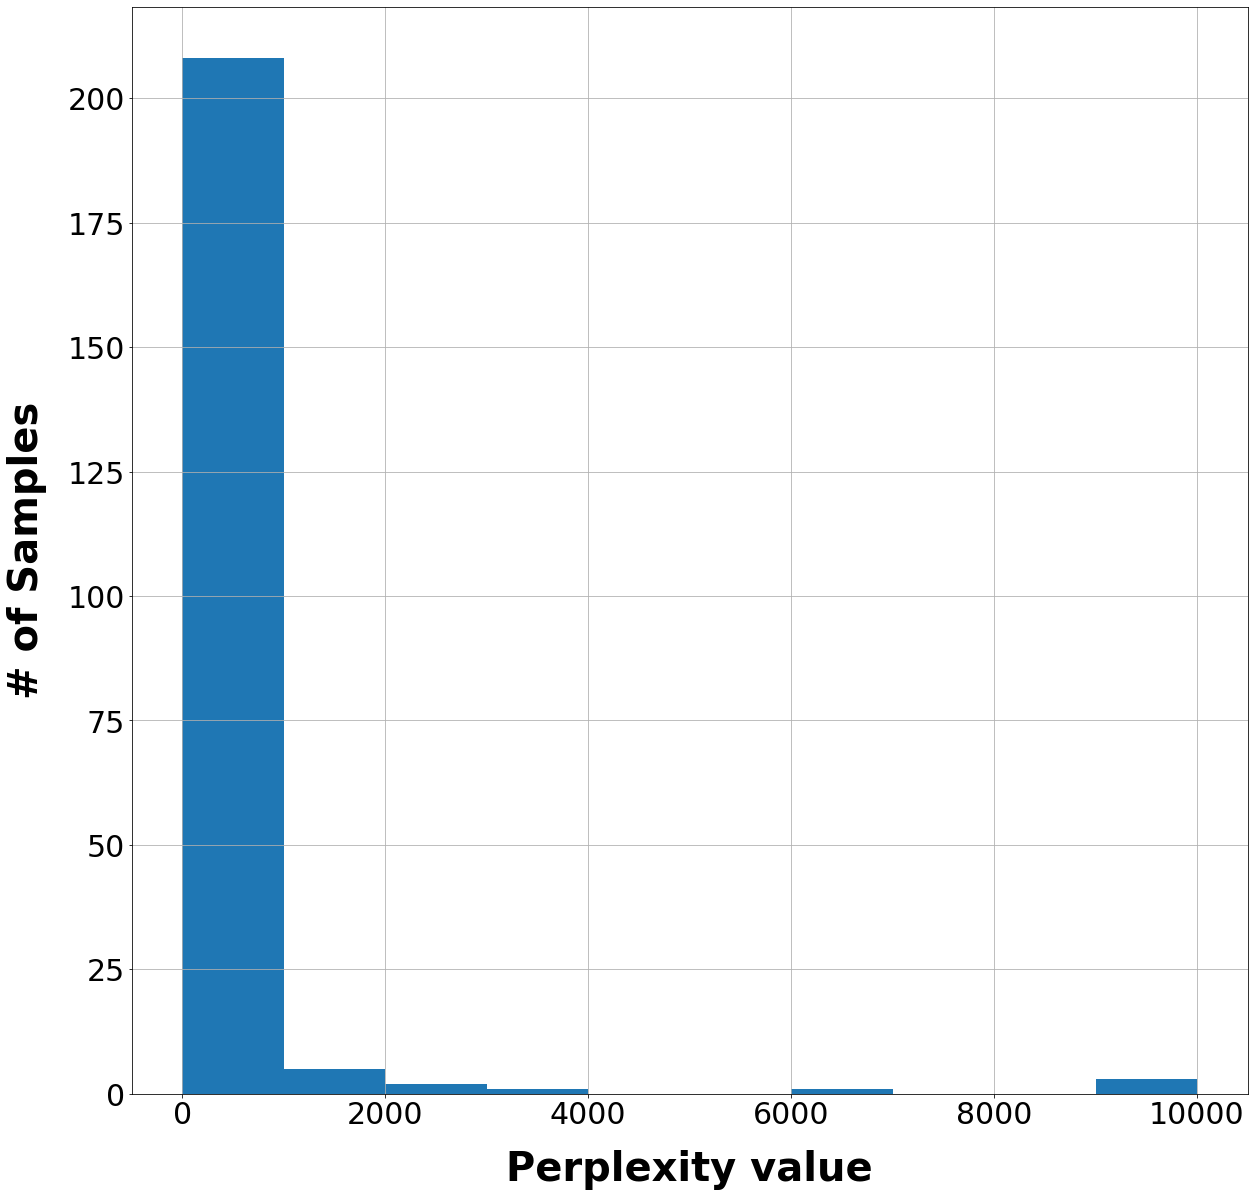

In [ ]:
bins = []
for i in range(0,210,10):
  bins.append(i)

final_df['pscores'] = final_df['pscores'].apply(lambda x: 10000 if x>10000 else x)
ax =final_df.hist(column='pscores',figsize=(20,20))
size=30
plt.ylabel('# of Samples',fontsize=size+10,labelpad=20,fontweight='bold')
plt.xlabel('Perplexity value',fontsize=size+10,labelpad=20,fontweight='bold')
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)


plt.title('')

(array([9.45693327e-04, 2.27330127e-05, 9.09320507e-06, 4.54660254e-06,
        0.00000000e+00, 0.00000000e+00, 4.54660254e-06, 0.00000000e+00,
        0.00000000e+00, 1.36398076e-05]),
 array([2.52494064e+00, 1.00227245e+03, 2.00201995e+03, 3.00176746e+03,
        4.00151496e+03, 5.00126247e+03, 6.00100998e+03, 7.00075748e+03,
        8.00050499e+03, 9.00025249e+03, 1.00000000e+04]),
 <a list of 10 Patch objects>)

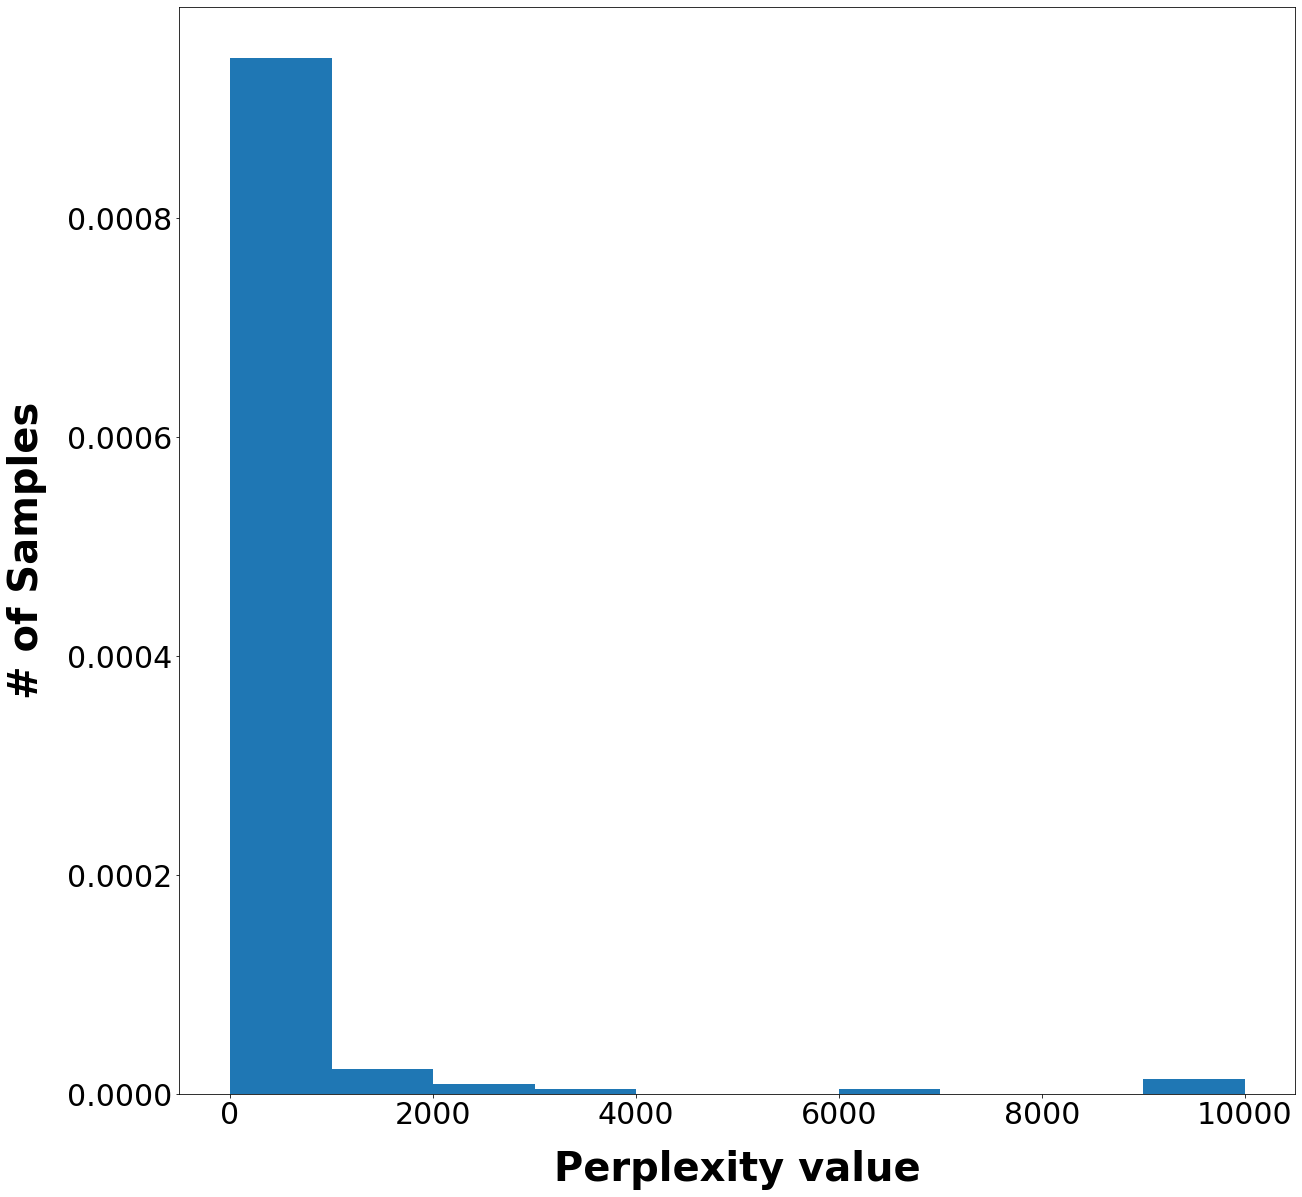

In [ ]:
#For GPT-2
plt.rcParams["figure.figsize"] = (20,20)
size=30
plt.ylabel('# of Samples',fontsize=size+10,labelpad=20,fontweight='bold')
plt.xlabel('Perplexity value',fontsize=size+10,labelpad=20,fontweight='bold')

plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.hist(vals, density=True)

(array([5.59010005e-04, 5.50995525e-05, 3.50633516e-05, 2.30416310e-05,
        1.40253406e-05, 1.90343909e-05, 7.01267032e-06, 1.00181005e-05,
        1.30235306e-05, 2.66481472e-04]),
 array([   18.06774864,  1016.26097378,  2014.45419891,  3012.64742405,
         4010.84064918,  5009.03387432,  6007.22709946,  7005.42032459,
         8003.61354973,  9001.80677486, 10000.        ]),
 <a list of 10 Patch objects>)

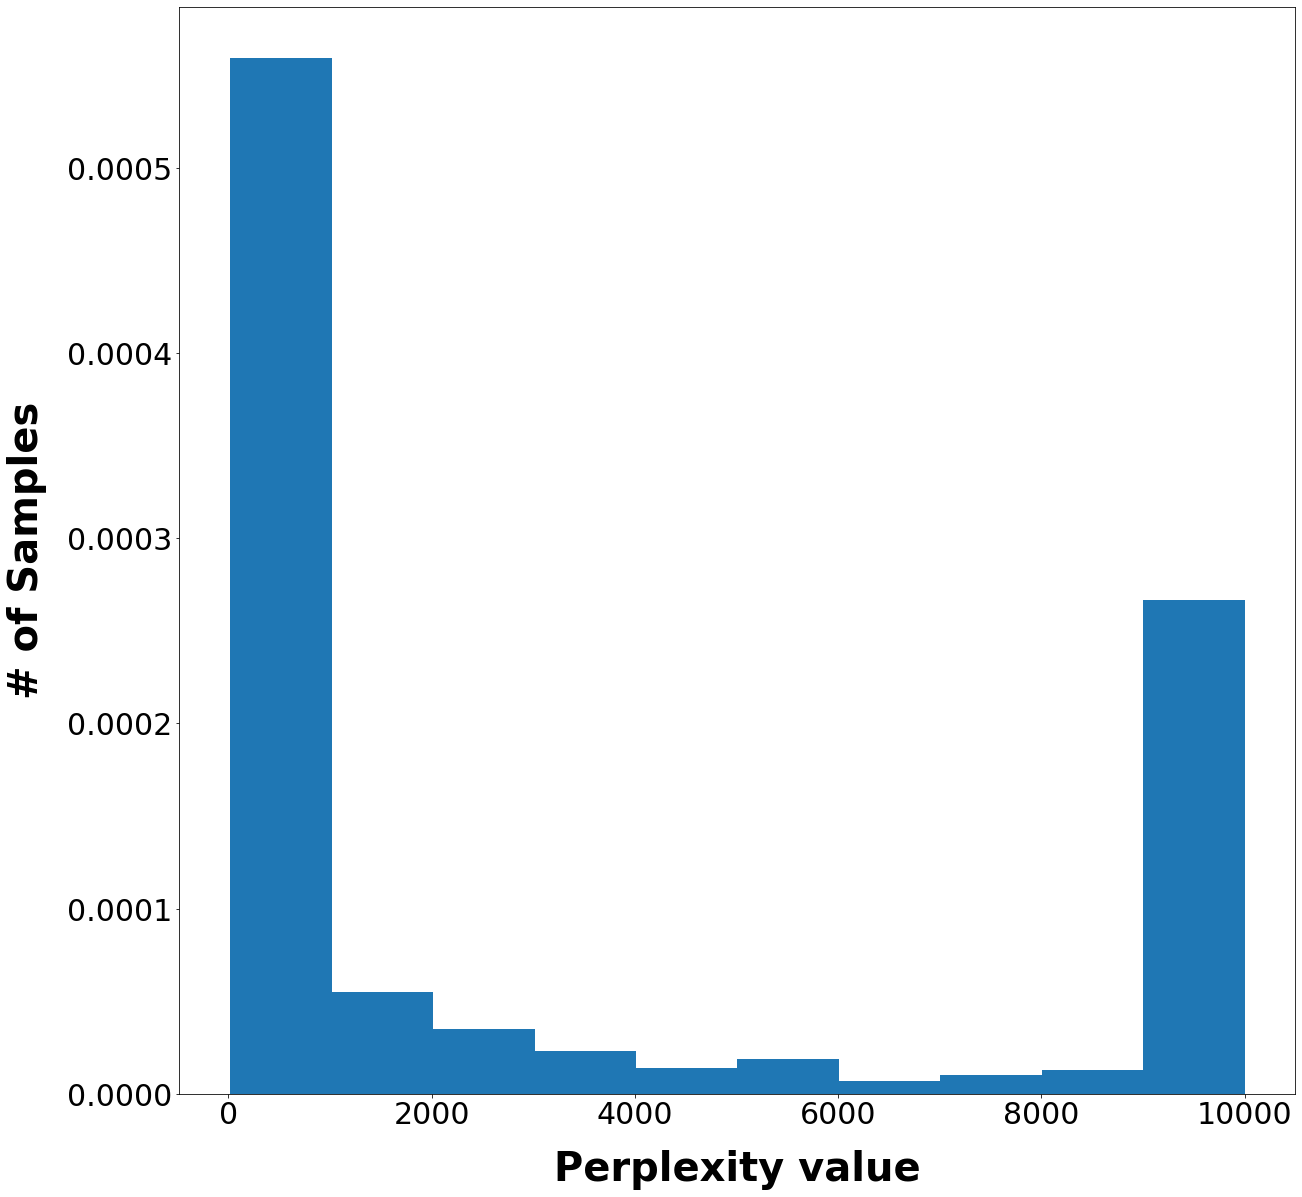

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
size=30
plt.ylabel('# of Samples',fontsize=size+10,labelpad=20,fontweight='bold')
plt.xlabel('Perplexity value',fontsize=size+10,labelpad=20,fontweight='bold')
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.hist(vals, density=True)



In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
df = pd.DataFrame(vals,columns=['a'])
df

,a
0,1599.385574
1,102.356828
2,10000.000000
3,10000.000000
4,10000.000000
...,...
995,678.420763
996,440.031905
997,10000.000000
998,28.060623


Text(0.5, 1.0, '')

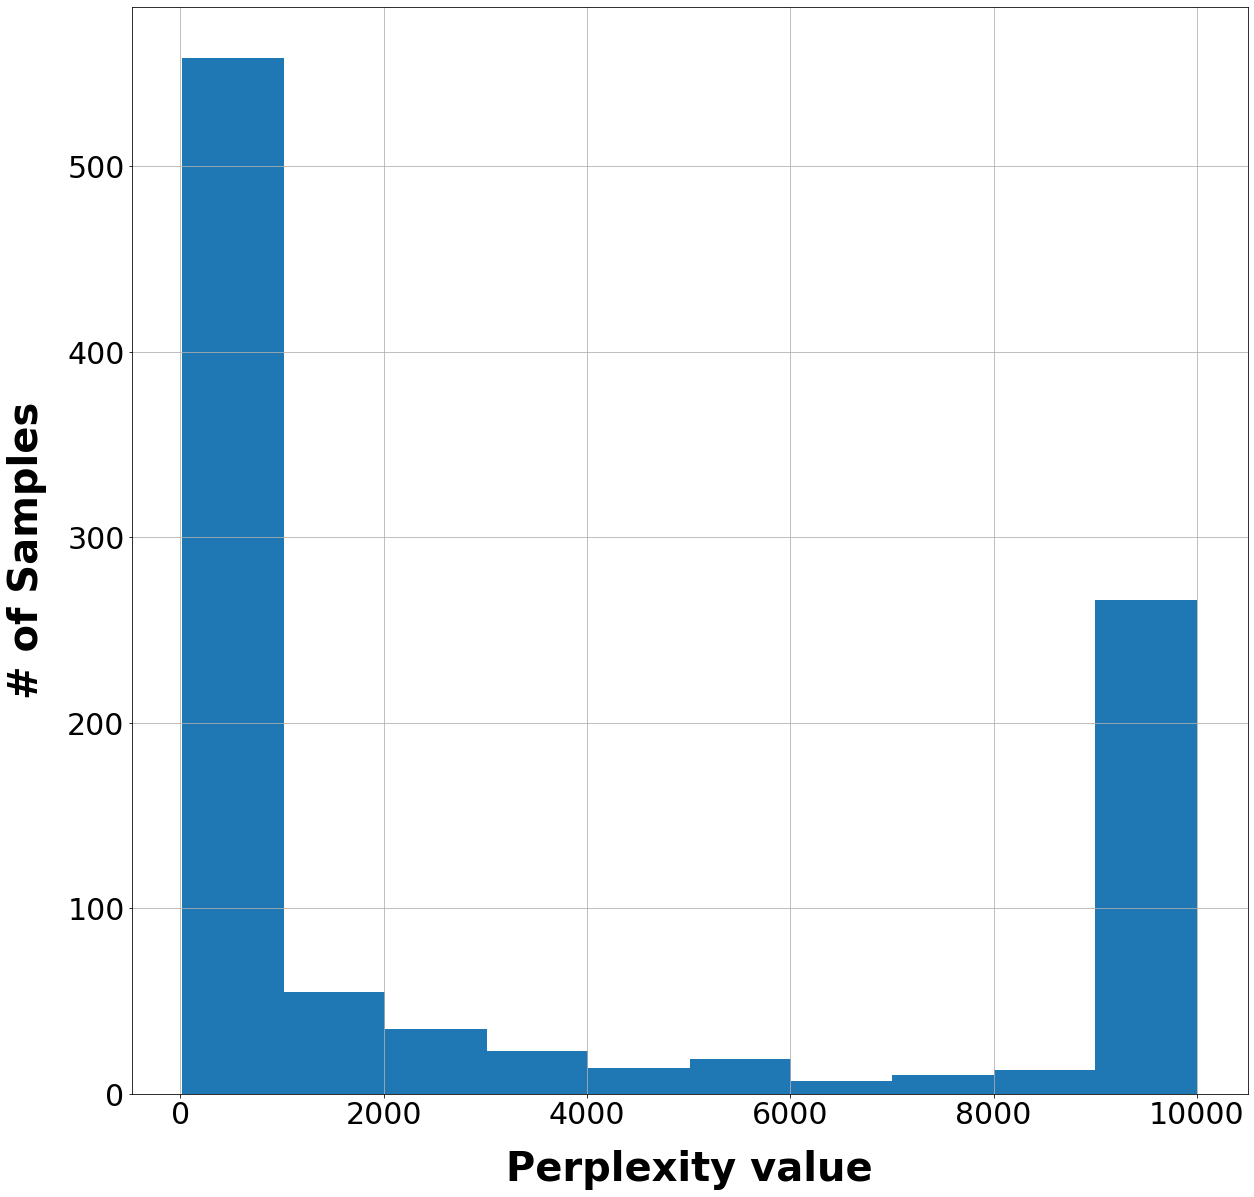

In [ ]:
bins = []
for i in range(0,210,10):
  bins.append(i)


ax =df.hist(column='a',figsize=(20,20))
size=30
plt.ylabel('# of Samples',fontsize=size+10,labelpad=20,fontweight='bold')
plt.xlabel('Perplexity value',fontsize=size+10,labelpad=20,fontweight='bold')
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)


plt.title('')